In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import ptitprince as pt
import numpy as np
import argparse
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pingouin as pg

C:\Users\delph\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Import dataframe & filter and count included subjects

In [2]:
#df = pd.read_excel(#insert file path here)
df_incl = df[df['rejection'] == 'no']
print(f'The number of included subjects is {df_incl.shape[0]}')

The number of included subjects is 183


In [3]:
df['rejection'].value_counts()

no     183
yes     15
Name: rejection, dtype: int64

***

In [4]:
for col in df_incl.columns: print(col)

Unnamed: 0
icognition_id
BRU2-code
date_testing
time_testing
date_of_birth
group
sex
native_language
education_n_years
edss
type_ms
disease_duration
year_first_symptoms
year_diagnosis
relapse_last_month
other_diseases
hospitalisation
visual_problems
manual_problems
sleep_medication_tranquilizers
dmt_brand_name
cognitive_exam_last_6_months
ehi_left_n_plus
ehi_right_n_plus
nhpt_dom_hand
nhpt_dom_1
nhpt_dom_2
nhpt_ndom_1
nhpt_ndom_2
sdmt
spart_1
spart_2
spart_3
spart_tot
digit_span_3_1
digit_span_3_2
digit_span_4_1
digit_span_4_2
digit_span_4_3
digit_span_4_4
digit_span_5_1
digit_span_5_2
digit_span_5_3
digit_span_5_4
digit_span_6_1
digit_span_6_2
digit_span_6_3
digit_span_6_4
digit_span_7_1
digit_span_7_2
bdi_total
fsmc_mental
fsmc_physical
fsmc_total
symbol_test_app_load
dot_test_app_load
digit_span_app_load
sdmt_paper_load
spart_paper_load
digit_span_paper_load
cog_app_test_nicest
cog_app_test_least_nice
important_testing_issues
rejection
remarks
finger_dexterity_test_app
nhpt_load
fam

# Calculate scores

## Finger Dexterity Test (FDT) & NHPT

In [5]:
df_incl.loc[:, 'egg_test_dom_time_total'] = df_incl['egg_test_dom_time_total'].apply(lambda x: x/1000)
df_incl.loc[:, 'egg_test_ndom_time_total'] = df_incl['egg_test_ndom_time_total'].apply(lambda x: x/1000)
df_incl.loc[:, 'egg_test_dom_time_total_retest'] = df_incl['egg_test_dom_time_total_retest'].apply(lambda x: x/1000)
df_incl.loc[:, 'egg_test_ndom_time_total_retest'] = df_incl['egg_test_ndom_time_total_retest'].apply(lambda x: x/1000)
df_incl.loc[:, 'nhpt_avg_dom'] = df_incl[['nhpt_dom_1', 'nhpt_dom_2']].mean(axis=1)
df_incl.loc[:, 'nhpt_avg_ndom'] = df_incl[['nhpt_ndom_1', 'nhpt_ndom_2']].mean(axis=1)

C:\Users\delph\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\delph\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


### Alternative scoring method: eggs per second for FDT and pegs per second for NHPT

In [6]:
# Repeat all test with egg_rate_dom/ndom and nhpt_rate_dom/ndom instead of egg_test_dom/ndom_time_total and nhpt_avg_dom/ndom to use this scoring method
df_incl["egg_rate_dom"] = df_incl["egg_test_dom_time_total"].apply(lambda x: 10/x)
df_incl["egg_rate_ndom"] = df_incl["egg_test_ndom_time_total"].apply(lambda x: 10/x)
df_incl["egg_rate_dom_retest"] = df_incl["egg_test_dom_time_total_retest"].apply(lambda x: 10/x)
df_incl["egg_rate_ndom_retest"] = df_incl["egg_test_ndom_time_total_retest"].apply(lambda x: 10/x)
df_incl["nhpt_rate_dom"] = df_incl["nhpt_avg_dom"].apply(lambda x: 9/x)
df_incl["nhpt_rate_ndom"] = df_incl["nhpt_avg_ndom"].apply(lambda x: 9/x)

<ipython-input-6-cbe679bbbaef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incl["egg_rate_dom"] = df_incl["egg_test_dom_time_total"].apply(lambda x: 10/x)
<ipython-input-6-cbe679bbbaef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incl["egg_rate_ndom"] = df_incl["egg_test_ndom_time_total"].apply(lambda x: 10/x)
<ipython-input-6-cbe679bbbaef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

## Sex as a numeric variable

In [7]:
df_incl['sex_num'] = df_incl['sex'].apply(lambda x: {"m": 1, "v": 2}.get(x))

<ipython-input-7-5aa503f5fd0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incl['sex_num'] = df_incl['sex'].apply(lambda x: {"m": 1, "v": 2}.get(x))


# Dataframes filtered for MS/HC, missing values & lag in FDT

In [8]:
df_ms = df_incl[df_incl['group'] == 'ms']
print(f'The number of MS subjects is {df_ms.shape[0]}')
df_hc = df_incl[df_incl['group'] == 'hc']
print(f'The number of healthy subjects is {df_hc.shape[0]}')


df_nonan_incl = df_incl[~df_incl['egg_test_dom_time_total'].isna() & ~df_incl['egg_test_ndom_time_total'].isna()]
print(f'The number of total subjects with a Finger Dexterity test for both the dominant and non-dominant hand is {df_nonan_incl.shape[0]}')

df_dom_nonan = df_incl[~df_incl['egg_test_dom_time_total'].isna()]
print(f'The number of subjects with a dominant Finger Dexterity test is {df_dom_nonan.shape[0]}')
df_ndom_nonan = df_incl[~df_incl['egg_test_ndom_time_total'].isna()]
print(f'The number of subjects with a non-dominant Finger Dexterity test is {df_ndom_nonan.shape[0]}')

df_dom_nonan_ms = df_ms[~df_ms['egg_test_dom_time_total'].isna()]
print(f'The number of MS subjects with a dominant Finger Dexterity test is {df_dom_nonan_ms.shape[0]}')
df_dom_nonan_hc = df_hc[~df_hc['egg_test_dom_time_total'].isna()]
print(f'The number of healthy subjects with a dominant Finger Dexterity test is {df_dom_nonan_hc.shape[0]}')


df_dom_nolag_ms = df_ms[df_ms['finger_dexterity_dom_lag'] == 'no']
print(f'The number of MS subjects without lag on the dominant Finger Dexterity test is {df_dom_nolag_ms.shape[0]}')
df_ndom_nolag_ms = df_ms[df_ms['finger_dexterity_ndom_lag'] == 'no']
print(f'The number of MS subjects without lag on the non-dominant Finger Dexterity test is {df_ndom_nolag_ms.shape[0]}')

df_dom_nolag_hc = df_hc[df_hc['finger_dexterity_dom_lag'] == 'no']
print(f'The number of healthy subjects without lag on the dominant Finger Dexterity test is {df_dom_nolag_hc.shape[0]}')
df_ndom_nolag_hc = df_hc[df_hc['finger_dexterity_ndom_lag'] == 'no']
print(f'The number of healthy subjects without lag on the non-dominant Finger Dexterity test is {df_ndom_nolag_hc.shape[0]}')

The number of MS subjects is 101
The number of healthy subjects is 82
The number of total subjects with a Finger Dexterity test for both the dominant and non-dominant hand is 137
The number of subjects with a dominant Finger Dexterity test is 146
The number of subjects with a non-dominant Finger Dexterity test is 139
The number of MS subjects with a dominant Finger Dexterity test is 65
The number of healthy subjects with a dominant Finger Dexterity test is 81
The number of MS subjects without lag on the dominant Finger Dexterity test is 99
The number of MS subjects without lag on the non-dominant Finger Dexterity test is 98
The number of healthy subjects without lag on the dominant Finger Dexterity test is 75
The number of healthy subjects without lag on the non-dominant Finger Dexterity test is 74


### Number of MS and HC subjects without finger dexterity test data

In [9]:
df_ms[['egg_test_dom_time_total', 'egg_test_ndom_time_total']].isna().sum()

egg_test_dom_time_total     36
egg_test_ndom_time_total    41
dtype: int64

In [10]:
df_dom_nonan_ms['egg_test_dom_time_total'].count()

65

In [11]:
df_hc[['egg_test_dom_time_total', 'egg_test_ndom_time_total']].isna().sum()

egg_test_dom_time_total     1
egg_test_ndom_time_total    3
dtype: int64

In [12]:
df_dom_nonan_hc['egg_test_dom_time_total'].count()

81

# Dataframes filtered for outliers

In [13]:
# define outliers (source: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Finding%20outliers%20using%20statistical%20methods,-Since%20the%20data&text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3%E2%80%93Q1)., adapted by Stijn)

def find_outliers_IQR(df, id_colname, data_colname):

    q1=df[data_colname].quantile(0.25)

    q3=df[data_colname].quantile(0.75)
    
    IQR=q3-q1
    
    outliers = df[((df[data_colname]<(q1-1.5*IQR)) | (df[data_colname]>(q3+1.5*IQR)))][[id_colname, data_colname]]
    
    return outliers

In [14]:
# drop outliers

def drop_on_id(df, list_of_ids):
    """
    Example list_of_ids ["XXXX", "XXXX"]
    """
    df_new = df.copy()
    df_new = df_new[~df_new["icognition_id"].isin(list_of_ids)]
    return df_new

#### Outlier analyses were removed due to privacy reasons

# Demographics

## Age

In [15]:
df_dom_nonan_ms["age"].count()

65

In [16]:
df_dom_nonan_hc["age"].count()

81

In [17]:
print(df_dom_nonan_ms["age"].mean())
print(df_dom_nonan_hc["age"].mean())
print(df_dom_nonan_ms["age"].std())
print(df_dom_nonan_hc["age"].std())

stats.mannwhitneyu(df_dom_nonan_ms['age'],df_dom_nonan_ms['age'])

45.21122689298627
46.68658747524158
9.37113613531908
14.794301063510769


MannwhitneyuResult(statistic=2112.5, pvalue=0.4990711194935152)

## Sex

In [18]:
df_dom_nonan_ms["sex"].count()

65

In [19]:
df_dom_nonan_hc["sex"].count()

81

In [20]:
df_dom_nonan_ms['sex'].value_counts(normalize = True)

v    0.646154
m    0.353846
Name: sex, dtype: float64

In [21]:
df_dom_nonan_hc['sex'].value_counts(normalize = True)

v    0.654321
m    0.345679
Name: sex, dtype: float64

In [22]:
def calculate_chi_square(df1, df2, col_name, labels):
    contingency_table = pd.DataFrame({labels[0]: [df1[col_name].value_counts().loc[labels[0]],
                                                  df2[col_name].value_counts().loc[labels[0]]],
                                      labels[1]: [df1[col_name].value_counts().loc[labels[1]],
                                                  df2[col_name].value_counts().loc[labels[1]]]})
    chi2, p, _, _ = stats.chi2_contingency(contingency_table.T)
    return chi2, p, contingency_table

In [23]:
chi2, p, contingency_table_sex = calculate_chi_square(df_dom_nonan_ms, df_dom_nonan_hc, 'sex', ['m', 'v'])
print(p)

0.9427838090935553


## Education level

In [24]:
df_dom_nonan_ms["education_n_years"].count()

65

In [25]:
df_dom_nonan_hc["education_n_years"].count()

81

In [26]:
print(df_dom_nonan_ms["education_n_years"].median())

q1=df_dom_nonan_ms['education_n_years'].quantile(0.25)
q3=df_dom_nonan_ms['education_n_years'].quantile(0.75)  
IQR=q3-q1
print(IQR)

15.0
5.0


In [27]:
print(df_dom_nonan_hc["education_n_years"].median())

q1=df_dom_nonan_hc['education_n_years'].quantile(0.25)
q3=df_dom_nonan_hc['education_n_years'].quantile(0.75)  
IQR=q3-q1
print(IQR)

15.0
4.0


In [28]:
stats.mannwhitneyu(df_dom_nonan_ms['education_n_years'],df_dom_nonan_hc['education_n_years'])

MannwhitneyuResult(statistic=2535.0, pvalue=0.3438913704057615)

## Disease duration

In [29]:
df_dom_nonan_ms["disease_duration"].count()

65

In [30]:
print(df_dom_nonan_ms["disease_duration"].mean())
print(df_dom_nonan_ms["disease_duration"].std())

12.1
7.431562756244478


## Disease type

In [31]:
df_dom_nonan_ms["type_ms"].count()

65

In [32]:
df_dom_nonan_ms['type_ms'].value_counts(normalize = True)

rrms    0.892308
spms    0.061538
ppms    0.046154
Name: type_ms, dtype: float64

## EDSS

In [33]:
df_dom_nonan_ms["edss"].count()

60

In [34]:
print(df_dom_nonan_ms["edss"].mean())
print(df_dom_nonan_ms["edss"].std())

print(df_dom_nonan_ms["edss"].median())
q1=df_dom_nonan_ms['edss'].quantile(0.25)
q3=df_dom_nonan_ms['edss'].quantile(0.75)
IQR=q3-q1
print(IQR)

3.0
1.6156018975989797
2.75
2.0


## Visual problems

In [35]:
df_dom_nonan_ms["visual_problems"].count()

65

In [36]:
df_dom_nonan_ms['visual_problems'].value_counts(normalize = True)

no     0.953846
yes    0.046154
Name: visual_problems, dtype: float64

In [37]:
df_dom_nonan_hc['visual_problems'].value_counts(normalize = True)

no    1.0
Name: visual_problems, dtype: float64

## Manual problems

In [38]:
df_dom_nonan_ms['manual_problems'].value_counts(normalize = True)

no     0.923077
yes    0.076923
Name: manual_problems, dtype: float64

In [39]:
df_dom_nonan_hc['manual_problems'].value_counts(normalize = True)

no     0.950617
yes    0.049383
Name: manual_problems, dtype: float64

In [40]:
calculate_chi_square(df_dom_nonan_ms, df_dom_nonan_hc, 'manual_problems', ['yes', 'no'])

(0.11658868301204077,
 0.7327641998165242,
    yes  no
 0    5  60
 1    4  77)

## Righthandedness

In [41]:
df_dom_nonan_ms['nhpt_dom_hand'].value_counts(normalize = True)

right    0.892308
left     0.107692
Name: nhpt_dom_hand, dtype: float64

In [42]:
df_dom_nonan_hc['nhpt_dom_hand'].value_counts(normalize = True)

right    0.876543
left     0.123457
Name: nhpt_dom_hand, dtype: float64

In [43]:
calculate_chi_square(df_dom_nonan_ms, df_dom_nonan_hc, 'nhpt_dom_hand', ['right', 'left'])

(0.001264491308570942,
 0.9716334534376803,
    right  left
 0     58     7
 1     71    10)

## NHPT

### Dominant

In [44]:
df_dom_nonan_ms["nhpt_avg_dom"].count()

65

In [45]:
df_dom_nonan_hc["nhpt_avg_dom"].count()

81

In [46]:
print(df_ms["nhpt_avg_dom"].mean())
print(df_hc["nhpt_avg_dom"].mean())

stats.mannwhitneyu(df_ms['nhpt_avg_dom'].dropna(),df_hc['nhpt_avg_dom'].dropna())

22.933316831683168
19.313271604938265


MannwhitneyuResult(statistic=3626.0, pvalue=0.09448102888032212)

In [47]:
# only subjects with dominant FDT included
print(df_dom_nonan_ms["nhpt_avg_dom"].mean())
print(df_dom_nonan_hc["nhpt_avg_dom"].mean())
print(df_dom_nonan_ms["nhpt_avg_dom"].std())
print(df_dom_nonan_hc["nhpt_avg_dom"].std())

stats.mannwhitneyu(df_dom_nonan_ms['nhpt_avg_dom'].dropna(),df_dom_nonan_hc['nhpt_avg_dom'].dropna())

19.58446153846154
19.313271604938265
4.314672380656941
3.3863820258955784


MannwhitneyuResult(statistic=2619.0, pvalue=0.47958738490521935)

#### no outliers

In [48]:
# print(df_dom_nooutliers_ms["nhpt_avg_dom"].mean())
# print(df_dom_nooutliers_hc["nhpt_avg_dom"].mean())
# print(df_dom_nooutliers_ms["nhpt_avg_dom"].std())
# print(df_dom_nooutliers_hc["nhpt_avg_dom"].std())

# stats.mannwhitneyu(df_dom_nooutliers_ms['nhpt_avg_dom'].dropna(),df_dom_nooutliers_hc['nhpt_avg_dom'].dropna())

### Non-dominant

In [49]:
df_dom_nonan_ms["nhpt_avg_ndom"].count()

65

In [50]:
df_dom_nonan_hc["nhpt_avg_ndom"].count()

81

In [51]:
print(df_ms["nhpt_avg_ndom"].mean())
print(df_hc["nhpt_avg_ndom"].mean())

stats.mannwhitneyu(df_ms['nhpt_avg_ndom'].dropna(), df_hc['nhpt_avg_ndom'].dropna())

21.549950495049504
19.9587037037037


MannwhitneyuResult(statistic=3229.0, pvalue=0.007391892560384442)

In [52]:
# only subjects with dominant FDT included
print(df_dom_nonan_ms["nhpt_avg_ndom"].mean())
print(df_dom_nonan_hc["nhpt_avg_ndom"].mean())
print(df_dom_nonan_ms["nhpt_avg_ndom"].std())
print(df_dom_nonan_hc["nhpt_avg_ndom"].std())

stats.mannwhitneyu(df_dom_nonan_ms['nhpt_avg_ndom'].dropna(),df_dom_nonan_hc['nhpt_avg_ndom'].dropna())

21.201384615384626
19.9587037037037
4.810792108284728
3.0293725400008347


MannwhitneyuResult(statistic=2254.5, pvalue=0.06857843559047885)

#### no outliers

In [53]:
# print(df_ndom_nooutliers_ms["nhpt_avg_ndom"].mean())
# print(df_ndom_nooutliers_hc["nhpt_avg_ndom"].mean())

# stats.mannwhitneyu(df_ndom_nooutliers_ms['nhpt_avg_ndom'].dropna(),df_ndom_nooutliers_hc['nhpt_avg_ndom'].dropna())

## BDI

In [54]:
df_dom_nonan_ms["bdi_total"].count()

63

In [55]:
df_dom_nonan_hc["bdi_total"].count()

80

In [56]:
print(df_dom_nonan_ms["bdi_total"].mean())
print(df_dom_nonan_hc["bdi_total"].mean())
print(df_dom_nonan_ms["bdi_total"].std())
print(df_dom_nonan_hc["bdi_total"].std())

stats.mannwhitneyu(df_dom_nonan_ms['bdi_total'].dropna(), df_dom_nonan_hc['bdi_total'].dropna())

9.253968253968255
5.6875
4.9740236648342115
5.0405790053188095


MannwhitneyuResult(statistic=1423.0, pvalue=3.8702868938898875e-06)

## FSMC

In [57]:
df_dom_nonan_ms["fsmc_total"].count()

63

In [58]:
df_dom_nonan_hc["fsmc_total"].count()

74

In [59]:
print(df_dom_nonan_ms["fsmc_total"].mean())
print(df_dom_nonan_hc["fsmc_total"].mean())
print(df_dom_nonan_ms["fsmc_total"].std())
print(df_dom_nonan_hc["fsmc_total"].std())

stats.mannwhitneyu(df_dom_nonan_ms['fsmc_total'].dropna(), df_dom_nonan_hc['fsmc_total'].dropna())

57.142857142857146
39.86486486486486
16.88944807331483
12.135450530183435


MannwhitneyuResult(statistic=971.0, pvalue=2.135518686815209e-09)

# 1. Concurrent validity: correlation between NHPT & FDT

In [60]:
# calculate Pearson or Spearman correlation

def calculate_correlation(df, varname_1, varname_2, method):
    df_filtered = df[(df[varname_1].notna()) & (df[varname_2].notna())]
    n = df_filtered.shape[0]
    if method == 'Pearson':
        r, p = stats.pearsonr(df_filtered[varname_1], df_filtered[varname_2])
    elif method == 'Spearman':
        r, p = stats.spearmanr(df_filtered[varname_1], df_filtered[varname_2])
    print(f'{method} correlation between {varname_1} and {varname_2}: r = {r}, p = {p}')

## All subjects

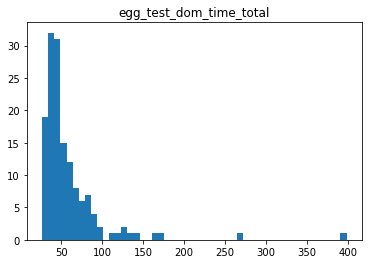

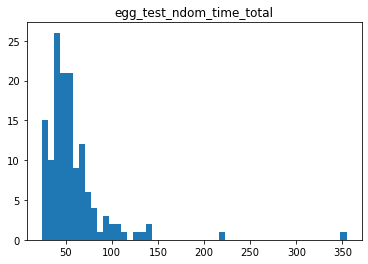

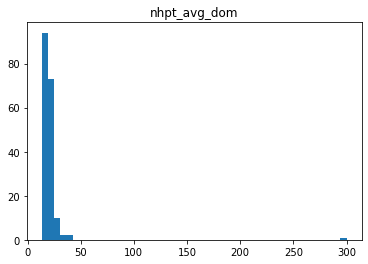

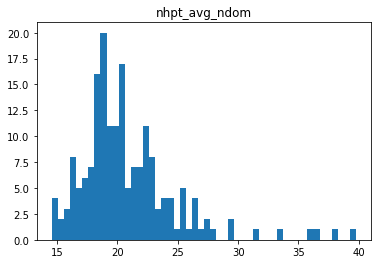

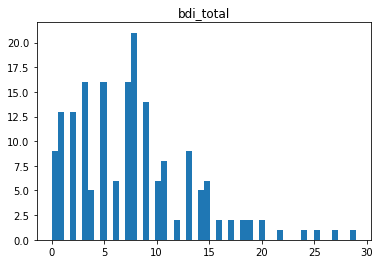

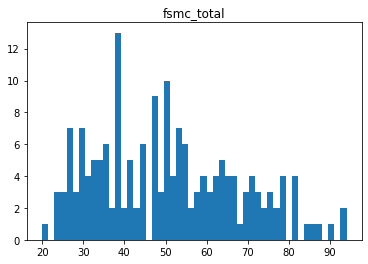

In [61]:
vars_to_plot = ['egg_test_dom_time_total', 'egg_test_ndom_time_total', 'nhpt_avg_dom', 'nhpt_avg_ndom', 'bdi_total', 'fsmc_total']

for var_to_plot in vars_to_plot:
    plt.hist(df_incl[var_to_plot], bins = 50)
    plt.title(var_to_plot)
    plt.show()

In [62]:
calculate_correlation(df_incl, 'egg_test_dom_time_total', 'nhpt_avg_dom', 'Spearman')
calculate_correlation(df_incl, 'egg_test_ndom_time_total', 'nhpt_avg_ndom', 'Spearman')

Spearman correlation between egg_test_dom_time_total and nhpt_avg_dom: r = 0.4176588822259493, p = 1.563241826075777e-07
Spearman correlation between egg_test_ndom_time_total and nhpt_avg_ndom: r = 0.46038266171945225, p = 1.181905426052152e-08


## MS & HC subjects

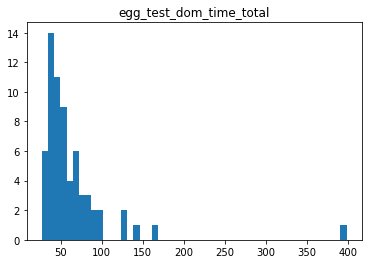

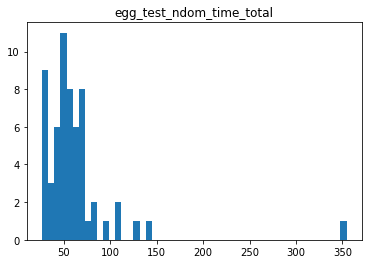

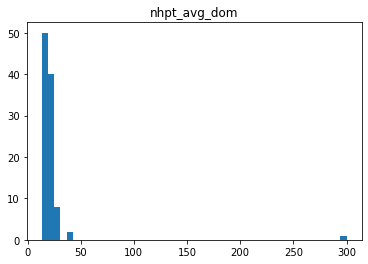

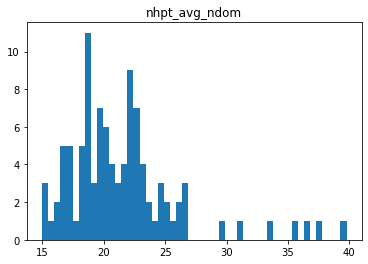

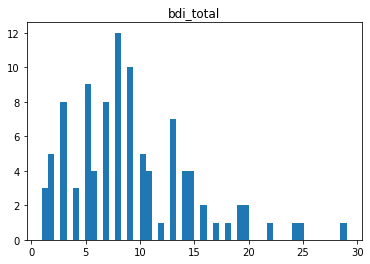

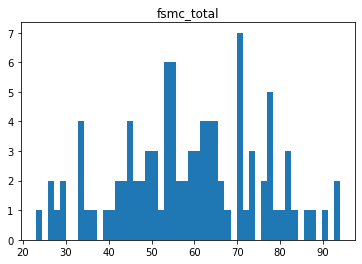

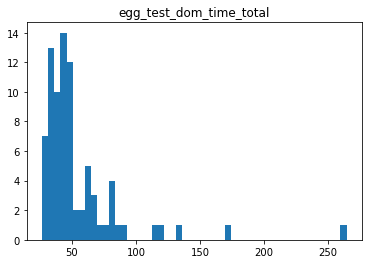

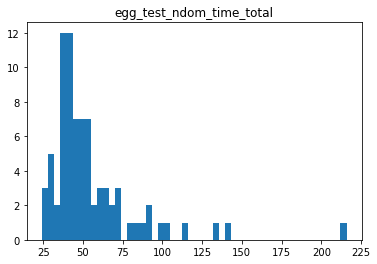

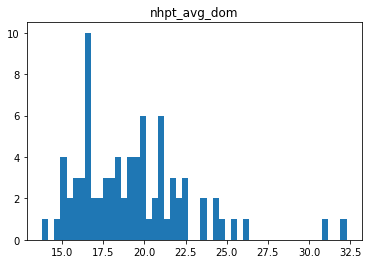

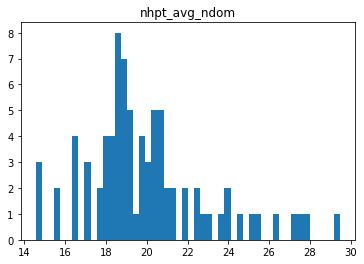

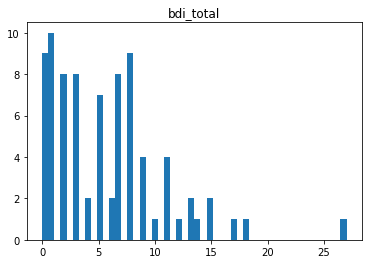

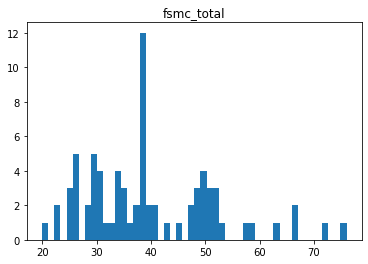

In [63]:
for var_to_plot in vars_to_plot:
    plt.hist(df_ms[var_to_plot], bins = 50)
    plt.title(var_to_plot)
    plt.show()

for var_to_plot in vars_to_plot:
    plt.hist(df_hc[var_to_plot], bins = 50)
    plt.title(var_to_plot)
    plt.show()

In [64]:
calculate_correlation(df_dom_nonan_ms, 'egg_test_dom_time_total', 'nhpt_avg_dom', 'Spearman')
calculate_correlation(df_dom_nonan_ms, 'egg_test_ndom_time_total', 'nhpt_avg_ndom', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_dom_time_total', 'nhpt_avg_dom', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_ndom_time_total', 'nhpt_avg_ndom', 'Spearman')

Spearman correlation between egg_test_dom_time_total and nhpt_avg_dom: r = 0.6248606832935103, p = 2.6463832020214022e-08
Spearman correlation between egg_test_ndom_time_total and nhpt_avg_ndom: r = 0.519933555063277, p = 2.878442535918934e-05
Spearman correlation between egg_test_dom_time_total and nhpt_avg_dom: r = 0.2779825992738483, p = 0.011981352242456918
Spearman correlation between egg_test_ndom_time_total and nhpt_avg_ndom: r = 0.36633844134214694, p = 0.0008988188562323208


### Exclusion of outliers & lag in FDT

In [65]:
# calculate_correlation(df_dom_nooutliers_ms, 'egg_test_dom_time_total', 'nhpt_avg_dom', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_ms, 'egg_test_ndom_time_total', 'nhpt_avg_ndom', 'Spearman')
# calculate_correlation(df_dom_nooutliers_hc, 'egg_test_dom_time_total', 'nhpt_avg_dom', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_hc, 'egg_test_ndom_time_total', 'nhpt_avg_ndom', 'Spearman')

In [66]:
calculate_correlation(df_dom_nolag_ms, 'egg_test_dom_time_total', 'nhpt_avg_dom', 'Spearman')
calculate_correlation(df_ndom_nolag_ms, 'egg_test_ndom_time_total', 'nhpt_avg_ndom', 'Spearman')
calculate_correlation(df_dom_nolag_hc, 'egg_test_dom_time_total', 'nhpt_avg_dom', 'Spearman')
calculate_correlation(df_ndom_nolag_hc, 'egg_test_ndom_time_total', 'nhpt_avg_ndom', 'Spearman')

Spearman correlation between egg_test_dom_time_total and nhpt_avg_dom: r = 0.6547217589008201, p = 5.860720181250474e-09
Spearman correlation between egg_test_ndom_time_total and nhpt_avg_ndom: r = 0.5634305404413077, p = 4.129487946142951e-06
Spearman correlation between egg_test_dom_time_total and nhpt_avg_dom: r = 0.328124666613325, p = 0.004053835958976255
Spearman correlation between egg_test_ndom_time_total and nhpt_avg_ndom: r = 0.31664686920448604, p = 0.006345940264915767


### Plots

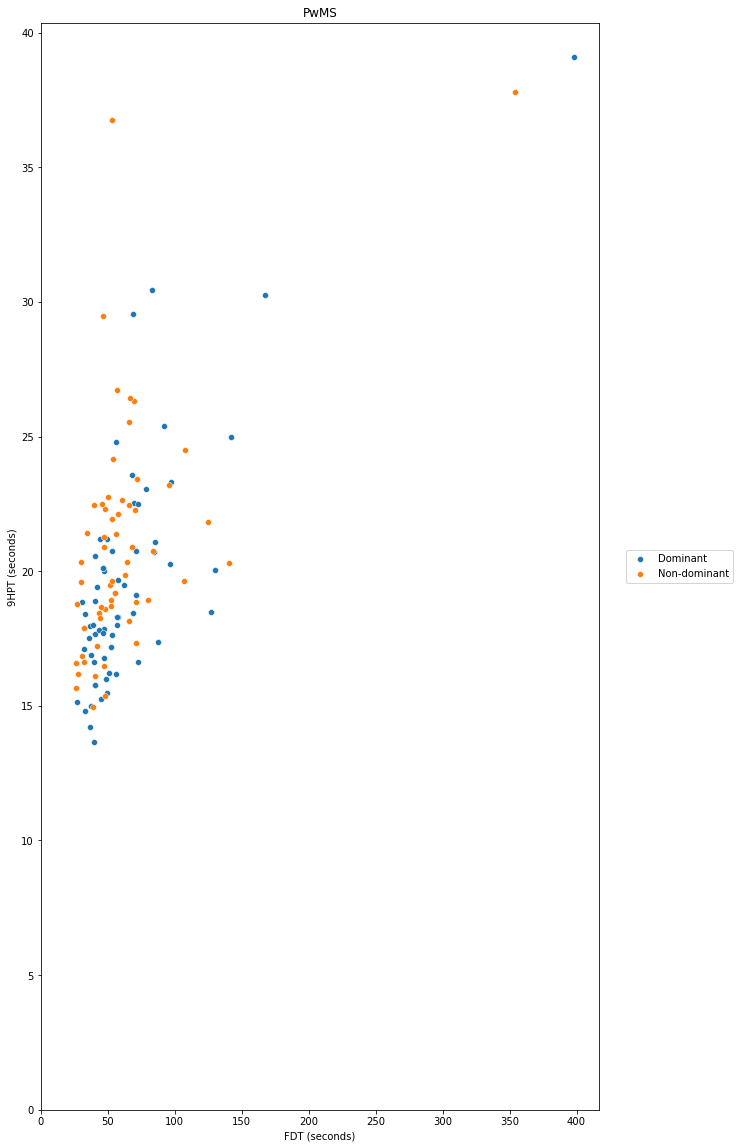

In [67]:
fig, ax = plt.subplots(1, 1, sharey = True, figsize=(10,20))
sns.scatterplot(x = 'egg_test_dom_time_total', y = 'nhpt_avg_dom', data = df_dom_nonan_ms, ax = ax, ci = False, label = 'Dominant')
sns.scatterplot(x = 'egg_test_ndom_time_total', y = 'nhpt_avg_ndom', data = df_dom_nonan_ms, ax = ax, ci = False, label = 'Non-dominant')
# sns.scatterplot(x = 'egg_test_dom_time_total', y = 'nhpt_avg_dom', data = df_dom_nooutliers_ms, ax = ax[1], ci = False, label = 'Dominant')
# sns.scatterplot(x = 'egg_test_ndom_time_total', y = 'nhpt_avg_ndom', data = df_ndom_nooutliers_ms, ax = ax[1], ci = False, label = 'Non-dominant')
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
#ax[1].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

ax.set_xlabel("FDT (seconds)")
#ax[1].set_xlabel("FDT (seconds")
ax.set_ylabel("9HPT (seconds)")
#ax[1].set_ylabel("9HPT (seconds)")
ax.set_title("PwMS")
#ax[1].set_title("PwMS")

plt.xlim(0, None)
plt.ylim(0, None)

plt.savefig("Concurrent validity - MS - final.jpg", dpi = 300, bbox_inches = "tight")

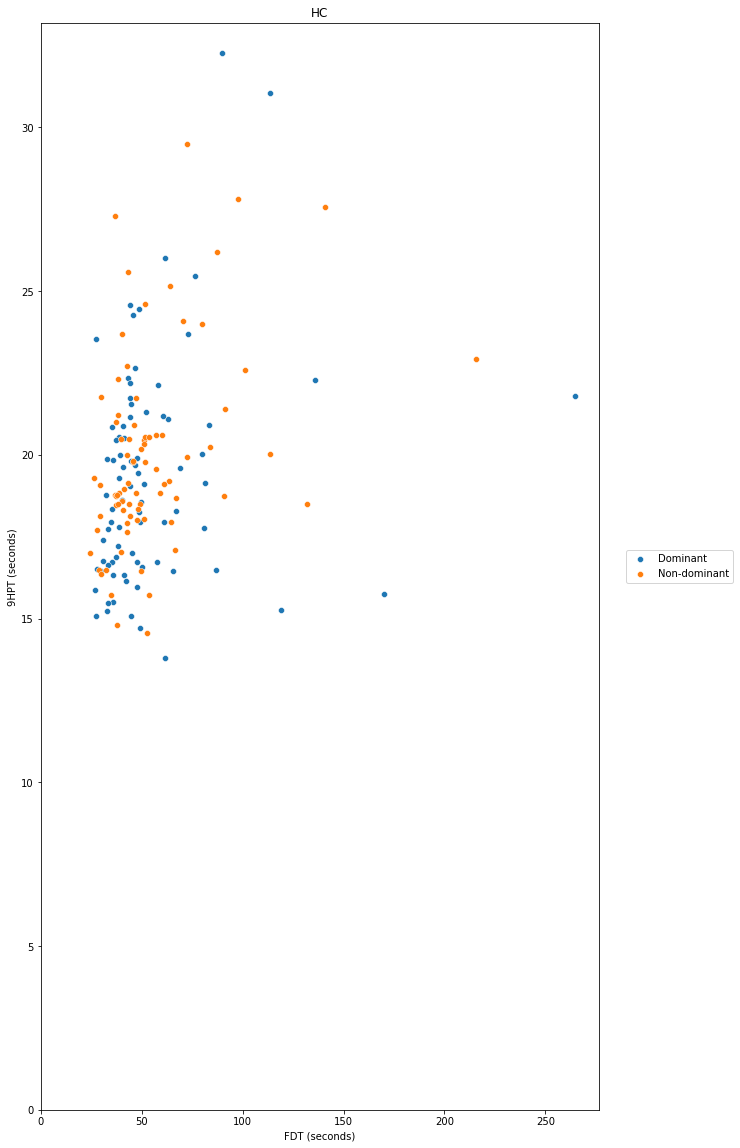

In [68]:
fig, ax = plt.subplots(1, 1, sharey = True, figsize=(10,20))
sns.scatterplot(x = 'egg_test_dom_time_total', y = 'nhpt_avg_dom', data = df_dom_nonan_hc, ax = ax, ci = False, label = 'Dominant')
sns.scatterplot(x = 'egg_test_ndom_time_total', y = 'nhpt_avg_ndom', data = df_dom_nonan_hc, ax = ax, ci = False, label = 'Non-dominant')
# sns.scatterplot(x = 'egg_test_dom_time_total', y = 'nhpt_avg_dom', data = df_dom_nooutliers_hc, ax = ax[1], ci = False, label = 'Dominant')
# sns.scatterplot(x = 'egg_test_ndom_time_total', y = 'nhpt_avg_ndom', data = df_ndom_nooutliers_hc, ax = ax[1], ci = False, label = 'Non-dominant')
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
#ax[1].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

ax.set_xlabel("FDT (seconds)")
#ax[1].set_xlabel("FDT (seconds)")
ax.set_ylabel("9HPT (seconds)")
#ax[1].set_ylabel("9HPT (seconds)")
ax.set_title("HC")
#ax[1].set_title("HC")

plt.xlim(0, None)
plt.ylim(0, None)

plt.savefig("Concurrent validity - HC - final.jpg", dpi = 300, bbox_inches = "tight")

# 2. Capacity to differentiate between MS & HC

In [69]:
print(df_dom_nonan_ms["egg_test_dom_time_total"].mean())
print(df_dom_nonan_hc["egg_test_dom_time_total"].mean())
print(df_dom_nonan_ms["egg_test_dom_time_total"].std())
print(df_dom_nonan_hc["egg_test_dom_time_total"].std())

stats.mannwhitneyu(df_dom_nonan_ms['egg_test_dom_time_total'],df_dom_nonan_hc['egg_test_dom_time_total'])

64.50896923076924
54.428617283950636
50.2584609185885
34.12439804801247


MannwhitneyuResult(statistic=2084.0, pvalue=0.015471279398017396)

In [70]:
print(df_dom_nonan_ms["egg_test_ndom_time_total"].mean())
print(df_dom_nonan_hc["egg_test_ndom_time_total"].mean())
print(df_dom_nonan_ms["egg_test_ndom_time_total"].std())
print(df_dom_nonan_hc["egg_test_ndom_time_total"].std())

stats.mannwhitneyu(df_dom_nonan_ms['egg_test_ndom_time_total'],df_dom_nonan_hc['egg_test_ndom_time_total'])

61.64270689655171
55.01708860759493
45.52198304926033
29.162981974515127


MannwhitneyuResult(statistic=2069.0, pvalue=0.013315824798388791)

### Without lag on FDT

In [71]:
print(df_dom_nolag_ms["egg_test_dom_time_total"].mean())
print(df_dom_nolag_hc["egg_test_dom_time_total"].mean())
print(df_dom_nolag_ms["egg_test_dom_time_total"].std())
print(df_dom_nolag_hc["egg_test_dom_time_total"].std())

stats.mannwhitneyu(df_dom_nolag_ms['egg_test_dom_time_total'],df_dom_nolag_hc['egg_test_dom_time_total'])

64.49690476190476
52.50892000000002
51.04333488312439
32.62007657818244


MannwhitneyuResult(statistic=1789.0, pvalue=2.5496574037543818e-09)

In [72]:
print(df_ndom_nolag_ms["egg_test_ndom_time_total"].mean())
print(df_ndom_nolag_hc["egg_test_ndom_time_total"].mean())
print(df_ndom_nolag_ms["egg_test_ndom_time_total"].std())
print(df_ndom_nolag_hc["egg_test_ndom_time_total"].std())

stats.mannwhitneyu(df_ndom_nolag_ms['egg_test_ndom_time_total'],df_ndom_nolag_hc['egg_test_ndom_time_total'])

61.67777586206894
51.72267123287671
45.53733333155205
26.534030083007863


MannwhitneyuResult(statistic=1742.0, pvalue=2.8537113432743844e-09)

### No outliers

In [73]:
# print(df_dom_nooutliers_ms["egg_test_dom_time_total"].mean())
# print(df_dom_nooutliers_hc["egg_test_dom_time_total"].mean())
# print(df_dom_nooutliers_ms["egg_test_dom_time_total"].std())
# print(df_dom_nooutliers_hc["egg_test_dom_time_total"].std())

# stats.mannwhitneyu(df_dom_nooutliers_ms['egg_test_dom_time_total'],df_dom_nooutliers_hc['egg_test_dom_time_total'])

In [74]:
# print(df_ndom_nooutliers_ms["egg_test_ndom_time_total"].mean())
# print(df_ndom_nooutliers_hc["egg_test_ndom_time_total"].mean())
# print(df_ndom_nooutliers_ms["egg_test_ndom_time_total"].std())
# print(df_ndom_nooutliers_hc["egg_test_ndom_time_total"].std())

# stats.mannwhitneyu(df_ndom_nooutliers_ms['egg_test_ndom_time_total'],df_ndom_nooutliers_hc['egg_test_ndom_time_total'])

## Effect size

In [75]:
# function to calculate Cohen's d for independent samples
# Source: https://machinelearningmastery.com/effect-size-measures-in-python/

def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = np.mean(d1), np.mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

In [76]:
cohend(df_dom_nonan_ms["egg_test_dom_time_total"], df_dom_nonan_hc["egg_test_dom_time_total"])

0.23963114521283535

In [77]:
cohend(df_dom_nonan_ms["egg_test_ndom_time_total"], df_dom_nonan_hc["egg_test_ndom_time_total"])

0.17749030409114852

### Without lag on FDT

In [78]:
cohend(df_dom_nolag_ms["egg_test_dom_time_total"], df_dom_nolag_hc["egg_test_dom_time_total"])

0.2720132412926664

In [79]:
cohend(df_ndom_nolag_ms["egg_test_ndom_time_total"], df_ndom_nolag_hc["egg_test_ndom_time_total"])

0.25828861726946367

### No outliers

In [80]:
# cohend(df_dom_nooutliers_ms["egg_test_dom_time_total"], df_dom_nooutliers_hc["egg_test_dom_time_total"])

In [81]:
# cohend(df_ndom_nooutliers_ms["egg_test_ndom_time_total"], df_ndom_nooutliers_hc["egg_test_ndom_time_total"])

## Point-biserial correlation

In [82]:
point_biserial, p_value = stats.pointbiserialr((df_nonan_incl['group'] == 'ms'), df_nonan_incl['egg_test_dom_time_total'])
print(p_value, point_biserial)

0.09810008187523758 0.1419063998779344


In [83]:
point_biserial, p_value = stats.pointbiserialr((df_nonan_incl['group'] == 'ms'), df_nonan_incl['egg_test_ndom_time_total'])
print(p_value, point_biserial)

0.3017718476364335 0.08886403826356847


### Plots

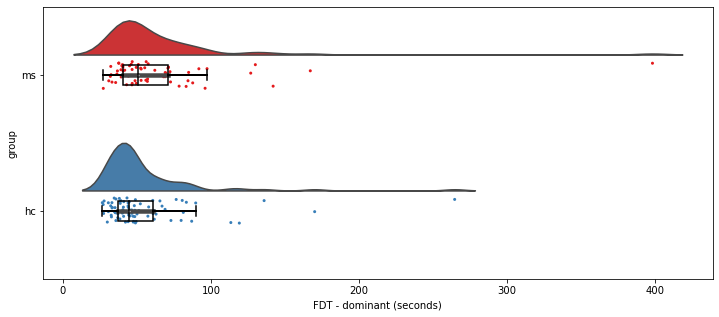

In [84]:
# https://github.com/RainCloudPlots/RainCloudPlots/blob/master/tutorial_python/raincloud_tutorial_python.ipynb
dx="egg_test_dom_time_total"; dy="group"; ort="h"; pal = "Set1"; sigma = .2
f, ax = plt.subplots(figsize=(12, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df_incl, palette = pal, bw = sigma, width = .7, ax = ax, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df_incl, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df_incl, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

ax.set_xlabel("FDT - dominant (seconds)")

plt.savefig('Raincloud discriminant dom with outliers - final.jpg', bbox_inches='tight', dpi = 300)

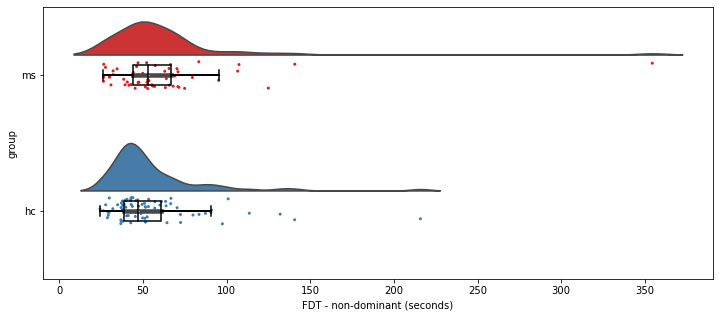

In [85]:
dx="egg_test_ndom_time_total"; dy="group"; ort="h"; pal = "Set1"; sigma = .2
f, ax = plt.subplots(figsize=(12, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = df_incl, palette = pal, bw = sigma, width = .7, ax = ax, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df_incl, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df_incl, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

ax.set_xlabel("FDT - non-dominant (seconds)")

plt.savefig('Raincloud discriminant ndom with outliers - final.jpg', bbox_inches='tight', dpi = 300)

#### without outliers

In [86]:
# dx="egg_test_dom_time_total"; dy="group"; ort="h"; pal = "Set1"; sigma = .2
# f, ax = plt.subplots(figsize=(12, 5))
# ax=pt.half_violinplot( x = dx, y = dy, data = df_dom_nooutliers_incl, palette = pal, bw = sigma, width = .7, ax = ax, orient = ort)
# ax=sns.stripplot( x = dx, y = dy, data = df_dom_nooutliers_incl, palette = pal, edgecolor = "white",
#                  size = 3, jitter = 1, zorder = 0, orient = ort)
# ax=sns.boxplot( x = dx, y = dy, data = df_dom_nooutliers_incl, color = "black", width = .15, zorder = 10,\
#             showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
#             showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
#                saturation = 1, orient = ort)

# ax.set_xlabel("FDT - dominant (seconds)")

# plt.savefig('Raincloud discriminant dom without outliers - final', bbox_inches='tight', dpi = 300)

In [87]:
# dx="egg_test_ndom_time_total"; dy="group"; ort="h"; pal = "Set1"; sigma = .2
# f, ax = plt.subplots(figsize=(12, 5))
# ax=pt.half_violinplot( x = dx, y = dy, data = df_ndom_nooutliers_incl, palette = pal, bw = sigma, width = .7, ax = ax, orient = ort)
# ax=sns.stripplot( x = dx, y = dy, data = df_ndom_nooutliers_incl, palette = pal, edgecolor = "white",
#                  size = 3, jitter = 1, zorder = 0, orient = ort)
# ax=sns.boxplot( x = dx, y = dy, data = df_ndom_nooutliers_incl, color = "black", width = .15, zorder = 10,\
#             showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
#             showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
#                saturation = 1, orient = ort)

# ax.set_xlabel("FDT - non-dominant (seconds)")

# plt.savefig('Raincloud discriminant ndom without outliers - final', bbox_inches='tight', dpi = 300)

# 3. Correlation with clinical parameters

## Age

In [88]:
calculate_correlation(df_dom_nonan_ms, 'egg_test_dom_time_total', 'age', 'Spearman')
calculate_correlation(df_dom_nonan_ms, 'egg_test_ndom_time_total', 'age', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_dom_time_total', 'age', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_ndom_time_total', 'age', 'Spearman')

Spearman correlation between egg_test_dom_time_total and age: r = 0.4582604895104895, p = 0.00012368582227687618
Spearman correlation between egg_test_ndom_time_total and age: r = 0.39524439386016186, p = 0.0021359419399834176
Spearman correlation between egg_test_dom_time_total and age: r = 0.4230352303523035, p = 8.335112612488667e-05
Spearman correlation between egg_test_ndom_time_total and age: r = 0.40552580331061344, p = 0.00020925205538636332


In [89]:
calculate_correlation(df_dom_nonan_ms, 'nhpt_avg_dom', 'age', 'Spearman')
calculate_correlation(df_dom_nonan_ms, 'nhpt_avg_ndom', 'age', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'nhpt_avg_dom', 'age', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'nhpt_avg_ndom', 'age', 'Spearman')

Spearman correlation between nhpt_avg_dom and age: r = 0.3589894884923755, p = 0.0033174973972655715
Spearman correlation between nhpt_avg_ndom and age: r = 0.3955724557862354, p = 0.0011084163707873352
Spearman correlation between nhpt_avg_dom and age: r = 0.2466477340132695, p = 0.026436288861384626
Spearman correlation between nhpt_avg_ndom and age: r = 0.27967795482761826, p = 0.011449974430425428


### Without lag on FDT

In [90]:
calculate_correlation(df_dom_nolag_ms, 'egg_test_dom_time_total', 'age', 'Spearman')
calculate_correlation(df_ndom_nolag_ms, 'egg_test_ndom_time_total', 'age', 'Spearman')
calculate_correlation(df_dom_nolag_hc, 'egg_test_dom_time_total', 'age', 'Spearman')
calculate_correlation(df_ndom_nolag_hc, 'egg_test_ndom_time_total', 'age', 'Spearman')

Spearman correlation between egg_test_dom_time_total and age: r = 0.4744623655913978, p = 8.547529867134854e-05
Spearman correlation between egg_test_ndom_time_total and age: r = 0.44926020486634477, p = 0.00040380121908749025
Spearman correlation between egg_test_dom_time_total and age: r = 0.45871977240398293, p = 3.4878884434282735e-05
Spearman correlation between egg_test_ndom_time_total and age: r = 0.4532580525731212, p = 5.652905392899388e-05


### No outliers

In [91]:
# calculate_correlation(df_dom_nooutliers_ms, 'egg_test_dom_time_total', 'age', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_ms, 'egg_test_ndom_time_total', 'age', 'Spearman')
# calculate_correlation(df_dom_nooutliers_hc, 'egg_test_dom_time_total', 'age', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_hc, 'egg_test_ndom_time_total', 'age', 'Spearman')

### Plots

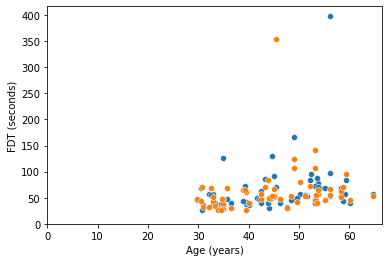

In [92]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'age', y = 'egg_test_dom_time_total', data = df_dom_nonan_ms, ci = False, label = 'Dominant')
sns.scatterplot(x = 'age', y = 'egg_test_ndom_time_total', data = df_dom_nonan_ms, ci = False, label = 'Non-dominant')

ax.set_xlabel("Age (years)")
ax.set_ylabel("FDT (seconds)")
ax.get_legend().remove()

plt.xlim(0, None)
plt.ylim(0, None)

plt.savefig("Age - final.jpg", dpi = 300, bbox_inches = "tight")

## Education

In [93]:
calculate_correlation(df_dom_nonan_ms, 'egg_test_dom_time_total', 'education_n_years', 'Spearman')
calculate_correlation(df_dom_nonan_ms, 'egg_test_ndom_time_total', 'education_n_years', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_dom_time_total', 'education_n_years', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_ndom_time_total', 'education_n_years', 'Spearman')

Spearman correlation between egg_test_dom_time_total and education_n_years: r = -0.01595528724500468, p = 0.8996150268025707
Spearman correlation between egg_test_ndom_time_total and education_n_years: r = -0.030369020997953185, p = 0.8209673431517162
Spearman correlation between egg_test_dom_time_total and education_n_years: r = -0.23027864060250358, p = 0.038623225871654746
Spearman correlation between egg_test_ndom_time_total and education_n_years: r = -0.1856794776646175, p = 0.10135270139666694


### Without lag on FDT

In [94]:
calculate_correlation(df_dom_nolag_ms, 'egg_test_dom_time_total', 'education_n_years', 'Spearman')
calculate_correlation(df_ndom_nolag_ms, 'egg_test_ndom_time_total', 'education_n_years', 'Spearman')
calculate_correlation(df_dom_nolag_hc, 'egg_test_dom_time_total', 'education_n_years', 'Spearman')
calculate_correlation(df_ndom_nolag_hc, 'egg_test_ndom_time_total', 'education_n_years', 'Spearman')

Spearman correlation between egg_test_dom_time_total and education_n_years: r = -0.03320178183880773, p = 0.796156110972362
Spearman correlation between egg_test_ndom_time_total and education_n_years: r = -0.00800905290042899, p = 0.9524198443377035
Spearman correlation between egg_test_dom_time_total and education_n_years: r = -0.2372545216261809, p = 0.04040959272245563
Spearman correlation between egg_test_ndom_time_total and education_n_years: r = -0.18865949965067358, p = 0.10993692795553722


### No outliers

In [95]:
# calculate_correlation(df_dom_nooutliers_ms, 'egg_test_dom_time_total', 'education_n_years', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_ms, 'egg_test_ndom_time_total', 'education_n_years', 'Spearman')
# calculate_correlation(df_dom_nooutliers_hc, 'egg_test_dom_time_total', 'education_n_years', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_hc, 'egg_test_ndom_time_total', 'education_n_years', 'Spearman')

## Disease duration

In [96]:
calculate_correlation(df_dom_nonan_ms, 'egg_test_dom_time_total', 'disease_duration', 'Spearman')
calculate_correlation(df_dom_nonan_ms, 'egg_test_ndom_time_total', 'disease_duration', 'Spearman')

Spearman correlation between egg_test_dom_time_total and disease_duration: r = 0.17237471794170786, p = 0.16973163597970647
Spearman correlation between egg_test_ndom_time_total and disease_duration: r = 0.31470993309357054, p = 0.01612517880502774


### Without lag on FDT

In [97]:
calculate_correlation(df_dom_nolag_ms, 'egg_test_dom_time_total', 'disease_duration', 'Spearman')
calculate_correlation(df_ndom_nolag_ms, 'egg_test_ndom_time_total', 'disease_duration', 'Spearman')

Spearman correlation between egg_test_dom_time_total and disease_duration: r = 0.21355023318517996, p = 0.09285878391344472
Spearman correlation between egg_test_ndom_time_total and disease_duration: r = 0.30460940923170265, p = 0.02007814131183839


### No outliers

In [98]:
# calculate_correlation(df_dom_nooutliers_ms, 'egg_test_dom_time_total', 'disease_duration', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_ms, 'egg_test_ndom_time_total', 'disease_duration', 'Spearman')

### Plots

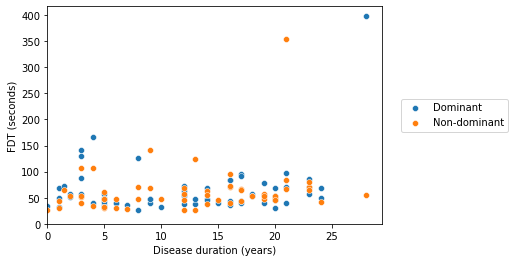

In [99]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'disease_duration', y = 'egg_test_dom_time_total', data = df_dom_nonan_ms, ci = False, label = 'Dominant')
sns.scatterplot(x = 'disease_duration', y = 'egg_test_ndom_time_total', data = df_dom_nonan_ms, ci = False, label = 'Non-dominant')
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

ax.set_xlabel("Disease duration (years)")
ax.set_ylabel("FDT (seconds)")

plt.xlim(0, None)
plt.ylim(0, None)

plt.savefig("Disease duration - final.jpg", dpi = 300, bbox_inches = "tight")

## EDSS

In [100]:
calculate_correlation(df_dom_nonan_ms, 'egg_test_dom_time_total', 'edss', 'Spearman')
calculate_correlation(df_dom_nonan_ms, 'egg_test_ndom_time_total', 'edss', 'Spearman')

Spearman correlation between egg_test_dom_time_total and edss: r = 0.35686850495137834, p = 0.00512697193044076
Spearman correlation between egg_test_ndom_time_total and edss: r = 0.30937321889665803, p = 0.024184787414883304


### Without lag on FDT

In [101]:
calculate_correlation(df_dom_nolag_ms, 'egg_test_dom_time_total', 'edss', 'Spearman')
calculate_correlation(df_ndom_nolag_ms, 'egg_test_ndom_time_total', 'edss', 'Spearman')

Spearman correlation between egg_test_dom_time_total and edss: r = 0.3484685616222054, p = 0.006836318109616242
Spearman correlation between egg_test_ndom_time_total and edss: r = 0.3584153700401012, p = 0.007785639654040054


### No outliers

In [102]:
# calculate_correlation(df_dom_nooutliers_ms, 'egg_test_dom_time_total', 'edss', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_ms, 'egg_test_ndom_time_total', 'edss', 'Spearman')

### Plots

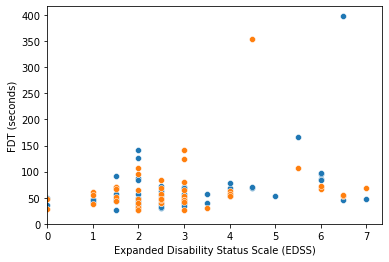

In [103]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'edss', y = 'egg_test_dom_time_total', data = df_dom_nonan_ms, ci = False, label = 'Dominant')
sns.scatterplot(x = 'edss', y = 'egg_test_ndom_time_total', data = df_dom_nonan_ms, ci = False, label = 'Non-dominant')
ax.get_legend().remove()

ax.set_xlabel("Expanded Disability Status Scale (EDSS)")
ax.set_ylabel("FDT (seconds)")

plt.xlim(0, None)
plt.ylim(0, None)

plt.savefig("EDSS - final.jpg", dpi = 300, bbox_inches = "tight")

## BDI

In [104]:
calculate_correlation(df_dom_nonan_ms, 'egg_test_dom_time_total', 'bdi_total', 'Spearman')
calculate_correlation(df_dom_nonan_ms, 'egg_test_ndom_time_total', 'bdi_total', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_dom_time_total', 'bdi_total', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_ndom_time_total', 'bdi_total', 'Spearman')

Spearman correlation between egg_test_dom_time_total and bdi_total: r = 0.06270366439523226, p = 0.6254014786933189
Spearman correlation between egg_test_ndom_time_total and bdi_total: r = 0.08571041604020706, p = 0.529945545256658
Spearman correlation between egg_test_dom_time_total and bdi_total: r = -0.04577949287179347, p = 0.686778007609486
Spearman correlation between egg_test_ndom_time_total and bdi_total: r = -0.09357895306377391, p = 0.4120492672034183


### Without lag on FDT

In [105]:
calculate_correlation(df_dom_nolag_ms, 'egg_test_dom_time_total', 'bdi_total', 'Spearman')
calculate_correlation(df_ndom_nolag_ms, 'egg_test_ndom_time_total', 'bdi_total', 'Spearman')
calculate_correlation(df_dom_nolag_hc, 'egg_test_dom_time_total', 'bdi_total', 'Spearman')
calculate_correlation(df_ndom_nolag_hc, 'egg_test_ndom_time_total', 'bdi_total', 'Spearman')

Spearman correlation between egg_test_dom_time_total and bdi_total: r = 0.09270788883072541, p = 0.477316718155149
Spearman correlation between egg_test_ndom_time_total and bdi_total: r = 0.1385810618057158, p = 0.308401962195543
Spearman correlation between egg_test_dom_time_total and bdi_total: r = -0.0390906524344162, p = 0.7408922342660209
Spearman correlation between egg_test_ndom_time_total and bdi_total: r = -0.07548292689224033, p = 0.5256230675960676


### No outliers

In [106]:
# calculate_correlation(df_dom_nooutliers_ms, 'egg_test_dom_time_total', 'bdi_total', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_ms, 'egg_test_ndom_time_total', 'bdi_total', 'Spearman')
# calculate_correlation(df_dom_nooutliers_hc, 'egg_test_dom_time_total', 'bdi_total', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_hc, 'egg_test_ndom_time_total', 'bdi_total', 'Spearman')

### Plots

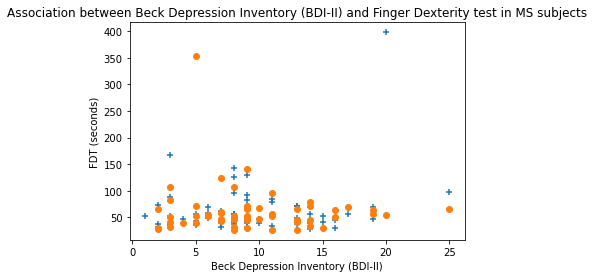

In [107]:
fig, ax = plt.subplots()
ax.scatter(df_dom_nonan_ms['bdi_total'], df_dom_nonan_ms['egg_test_dom_time_total'], marker = '+')
ax.scatter(df_dom_nonan_ms['bdi_total'], df_dom_nonan_ms['egg_test_ndom_time_total'], marker = 'o')
ax.set_xlabel("Beck Depression Inventory (BDI-II)")
ax.set_ylabel("FDT (seconds)")
ax.set_title("Association between Beck Depression Inventory (BDI-II) and Finger Dexterity test in MS subjects")
plt.show()

## FSMC

In [108]:
calculate_correlation(df_dom_nonan_ms, 'egg_test_dom_time_total', 'fsmc_total', 'Spearman')
calculate_correlation(df_dom_nonan_ms, 'egg_test_ndom_time_total', 'fsmc_total', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_dom_time_total', 'fsmc_total', 'Spearman')
calculate_correlation(df_dom_nonan_hc, 'egg_test_ndom_time_total', 'fsmc_total', 'Spearman')

Spearman correlation between egg_test_dom_time_total and fsmc_total: r = 0.09089054615044467, p = 0.4786700139899429
Spearman correlation between egg_test_ndom_time_total and fsmc_total: r = 0.15972236338720852, p = 0.2396501752530134
Spearman correlation between egg_test_dom_time_total and fsmc_total: r = -0.1622427855409099, p = 0.167256255313442
Spearman correlation between egg_test_ndom_time_total and fsmc_total: r = -0.28620193646720765, p = 0.01480072469351026


### Without lag on FDT

In [109]:
calculate_correlation(df_dom_nolag_ms, 'egg_test_dom_time_total', 'fsmc_total', 'Spearman')
calculate_correlation(df_ndom_nolag_ms, 'egg_test_ndom_time_total', 'fsmc_total', 'Spearman')
calculate_correlation(df_dom_nolag_hc, 'egg_test_dom_time_total', 'fsmc_total', 'Spearman')
calculate_correlation(df_ndom_nolag_hc, 'egg_test_ndom_time_total', 'fsmc_total', 'Spearman')

Spearman correlation between egg_test_dom_time_total and fsmc_total: r = 0.08899589927704178, p = 0.49520370166007777
Spearman correlation between egg_test_ndom_time_total and fsmc_total: r = 0.19045341715747957, p = 0.15972878310371127
Spearman correlation between egg_test_dom_time_total and fsmc_total: r = -0.17731082698657943, p = 0.14803025094780942
Spearman correlation between egg_test_ndom_time_total and fsmc_total: r = -0.2930833076919899, p = 0.016929829764801282


### No outliers

In [110]:
# calculate_correlation(df_dom_nooutliers_ms, 'egg_test_dom_time_total', 'fsmc_total', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_ms, 'egg_test_ndom_time_total', 'fsmc_total', 'Spearman')
# calculate_correlation(df_dom_nooutliers_hc, 'egg_test_dom_time_total', 'fsmc_total', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_hc, 'egg_test_ndom_time_total', 'fsmc_total', 'Spearman')

### Plots

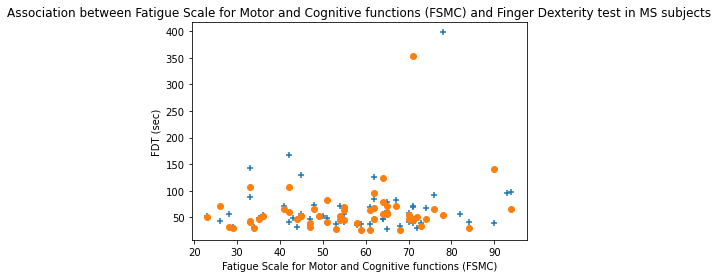

In [111]:
fig, ax = plt.subplots()
ax.scatter(df_dom_nonan_ms['fsmc_total'], df_dom_nonan_ms['egg_test_dom_time_total'], marker = '+')
ax.scatter(df_dom_nonan_ms['fsmc_total'], df_dom_nonan_ms['egg_test_ndom_time_total'], marker = 'o')
ax.set_xlabel("Fatigue Scale for Motor and Cognitive functions (FSMC)")
ax.set_ylabel("FDT (sec)")
ax.set_title("Association between Fatigue Scale for Motor and Cognitive functions (FSMC) and Finger Dexterity test in MS subjects")
plt.show()

# 4. Test-retest reliability

## Spearman & Pearson correlation

In [112]:
calculate_correlation(df_incl, 'egg_test_dom_time_total', 'egg_test_dom_time_total_retest', 'Spearman')
calculate_correlation(df_incl, 'egg_test_ndom_time_total', 'egg_test_ndom_time_total_retest', 'Spearman')

Spearman correlation between egg_test_dom_time_total and egg_test_dom_time_total_retest: r = 0.7082706766917292, p = 0.0004746151082516953
Spearman correlation between egg_test_ndom_time_total and egg_test_ndom_time_total_retest: r = 0.8165413533834586, p = 1.1247209263971732e-05


In [113]:
calculate_correlation(df_incl, 'egg_test_dom_time_total', 'egg_test_dom_time_total_retest', 'Pearson')
calculate_correlation(df_incl, 'egg_test_ndom_time_total', 'egg_test_ndom_time_total_retest', 'Pearson')

Pearson correlation between egg_test_dom_time_total and egg_test_dom_time_total_retest: r = 0.6933317842939232, p = 0.00069970657872126
Pearson correlation between egg_test_ndom_time_total and egg_test_ndom_time_total_retest: r = 0.8659012828966869, p = 8.102748762984716e-07


### no outliers

In [114]:
# calculate_correlation(df_dom_nooutliers_retest, 'egg_test_dom_time_total', 'egg_test_dom_time_total_retest', 'Spearman')
# calculate_correlation(df_ndom_nooutliers_retest, 'egg_test_ndom_time_total', 'egg_test_ndom_time_total_retest', 'Spearman')

In [115]:
# calculate_correlation(df_dom_nooutliers_retest, 'egg_test_dom_time_total', 'egg_test_dom_time_total_retest', 'Pearson')
# calculate_correlation(df_ndom_nooutliers_retest, 'egg_test_ndom_time_total', 'egg_test_ndom_time_total_retest', 'Pearson')

## ICC

In [116]:
def calculate_icc(df, test_column, retest_column):   
    # source: https://www.statology.org/intraclass-correlation-coefficient-python/#:~:text=An%20intraclass%20correlation%20coefficient%20(ICC,and%201%20indicating%20perfect%20reliability.&text=where%3A,The%20name%20of%20the%20dataframe
    # Create empty dataframe
    icc_df = pd.DataFrame()
    
    # Fill dataframe
    exam = 0
    for i, row in df.iterrows():
        test_value = row[test_column]
        retest_value = row[retest_column]
        if not np.isnan(test_value) and not np.isnan(retest_value):
            icc_df = pd.concat([icc_df, pd.DataFrame({'exam': [exam], 'judge': ['baseline'], 'rating': [test_value]})])
            icc_df = pd.concat([icc_df, pd.DataFrame({'exam': [exam], 'judge': ['retest'], 'rating': [retest_value]})])
            exam += 1
    
    # Calculate ICC
    icc = pg.intraclass_corr(data=icc_df, targets='exam', raters='judge', ratings='rating')
    print('Number of subjects: ', icc_df.shape[0]/2)
    print(icc.set_index('Type'))
    print(icc_df)
    #return icc_df, icc

In [117]:
calculate_icc(df_incl, 'egg_test_dom_time_total', 'egg_test_dom_time_total_retest')

Number of subjects:  20.0
                   Description       ICC         F  df1  df2      pval  \
Type                                                                     
ICC1    Single raters absolute  0.279231  1.774813   19   20  0.105884   
ICC2      Single random raters  0.316778  2.094153   19   19  0.057910   
ICC3       Single fixed raters  0.353620  2.094153   19   19  0.057910   
ICC1k  Average raters absolute  0.436560  1.774813   19   20  0.105884   
ICC2k    Average random raters  0.481141  2.094153   19   19  0.057910   
ICC3k     Average fixed raters  0.522480  2.094153   19   19  0.057910   

               CI95%  
Type                  
ICC1   [-0.17, 0.63]  
ICC2   [-0.08, 0.65]  
ICC3   [-0.09, 0.68]  
ICC1k   [-0.4, 0.78]  
ICC2k  [-0.17, 0.78]  
ICC3k  [-0.21, 0.81]  
   exam     judge   rating
0     0  baseline   27.234
0     0    retest   29.077
0     1  baseline  135.895
0     1    retest   49.746
0     2  baseline   46.469
0     2    retest   30.214
0     3 

In [118]:
calculate_icc(df_incl, 'egg_test_ndom_time_total', 'egg_test_ndom_time_total_retest')

Number of subjects:  20.0
                   Description       ICC         F  df1  df2      pval  \
Type                                                                     
ICC1    Single raters absolute  0.479351  2.841358   19   20  0.012521   
ICC2      Single random raters  0.518838  4.149438   19   19  0.001609   
ICC3       Single fixed raters  0.611608  4.149438   19   19  0.001609   
ICC1k  Average raters absolute  0.648056  2.841358   19   20  0.012521   
ICC2k    Average random raters  0.683204  4.149438   19   19  0.001609   
ICC3k     Average fixed raters  0.759003  4.149438   19   19  0.001609   

              CI95%  
Type                 
ICC1   [0.07, 0.75]  
ICC2   [0.07, 0.78]  
ICC3   [0.24, 0.83]  
ICC1k  [0.13, 0.86]  
ICC2k  [0.13, 0.88]  
ICC3k   [0.39, 0.9]  
   exam     judge   rating
0     0  baseline   36.972
0     0    retest   37.786
0     1  baseline   72.561
0     1    retest   48.835
0     2  baseline   40.328
0     2    retest   29.425
0     3  baselin

In [119]:
# calculate_icc(df_dom_nooutliers_incl, 'egg_test_dom_time_total', 'egg_test_dom_time_total_retest')

In [120]:
# calculate_icc(df_ndom_nooutliers_incl, 'egg_test_ndom_time_total', 'egg_test_ndom_time_total_retest')

In [121]:
print(df_dom_nonan_hc["egg_test_dom_time_total"].mean())
print(df_dom_nonan_hc["egg_test_dom_time_total_retest"].mean())
print(df_dom_nonan_hc["egg_test_ndom_time_total"].mean())
print(df_dom_nonan_hc["egg_test_ndom_time_total_retest"].mean())

54.428617283950636
41.76360000000001
55.01708860759493
46.123649999999984


In [122]:
stats.mannwhitneyu(df_dom_nonan_hc['egg_test_dom_time_total'],df_dom_nonan_hc['egg_test_dom_time_total_retest'])
stats.mannwhitneyu(df_dom_nonan_hc['egg_test_ndom_time_total'],df_dom_nonan_hc['egg_test_ndom_time_total_retest'])

MannwhitneyuResult(statistic=1056.0, pvalue=4.672894072568928e-14)

### Plots

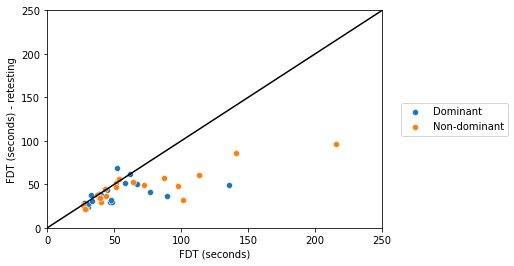

In [123]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'egg_test_dom_time_total', y = 'egg_test_dom_time_total_retest', data = df_dom_nonan_hc, ci = False, label = 'Dominant')
sns.scatterplot(x = 'egg_test_ndom_time_total', y = 'egg_test_ndom_time_total_retest', data = df_dom_nonan_hc, ci = False, label = 'Non-dominant')
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

ax.set_xlabel("FDT (seconds)")
ax.set_ylabel("FDT (seconds) - retesting")

plt.xlim(0, 250)
plt.ylim(0, 250)
plt.plot([0, 250], [0, 250], color = 'black')

plt.savefig("Retest - fancy.jpg", dpi = 300, bbox_inches = "tight")

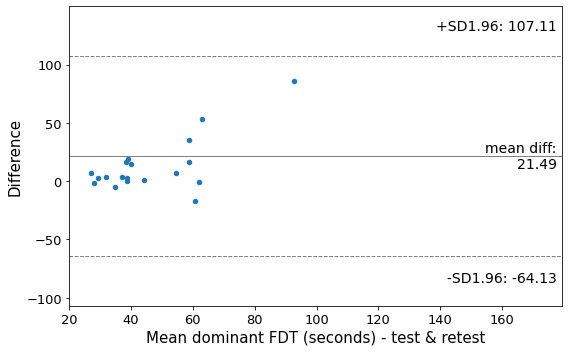

In [124]:
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(df_dom_nonan_hc['egg_test_dom_time_total'], df_dom_nonan_hc['egg_test_dom_time_total_retest'], ax = ax)
ax.set_xlabel("Mean dominant FDT (seconds) - test & retest")
plt.savefig("Bland_altman_dom", dpi = 300, bbox_inches = "tight")

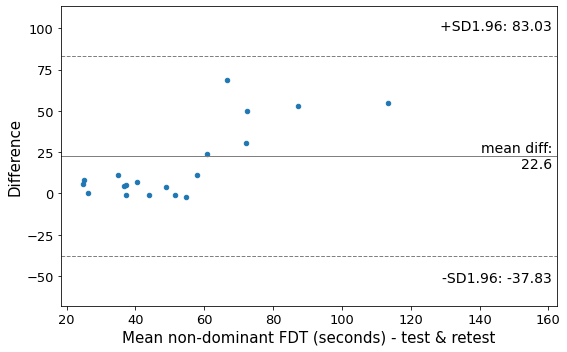

In [125]:
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(df_dom_nonan_hc['egg_test_ndom_time_total'], df_dom_nonan_hc['egg_test_ndom_time_total_retest'], ax = ax)
ax.set_xlabel("Mean non-dominant FDT (seconds) - test & retest")
plt.savefig("Bland_altman_ndom", dpi = 300, bbox_inches = "tight")

# Regression-based normalisation

In [ ]:
def z_normalise(df_hc_overall, df_to_normalise, target_colname, covariates_colnames, lower_is_better):
    """
    This function performs z-normalisation
    """

    # Reject lines with missing value on any of the variables
    df_hc = df_hc_overall.copy()
    df_hc = df_hc.dropna(subset=covariates_colnames + [target_colname], how='any')

    # Get tools for z-normalisation from
    model, scaler_X, scaler_y, diff_mean_hc, diff_std_hc = get_healthy_model(df_hc, target_colname, covariates_colnames)

    # Loop over all rows in the data frame
    z_list = []
    for i, row in df_to_normalise.iterrows():
        row_df = row.to_frame().T

        # Split and scale data
        y = row_df[target_colname].iloc[0]
        y = np.array([[y]])  # StandardScaler expects 2D array
        y = scaler_y.transform(y)
        y = np.squeeze(y)
        X = row_df[covariates_colnames]
        X = sm.add_constant(X, has_constant='add')  # https://github.com/statsmodels/statsmodels/issues/7057
        X = scaler_X.transform(X)

        y_pred = model.predict(X)
        diff = y - y_pred[0]
        z = diff_norm = (diff - diff_mean_hc)/diff_std_hc

        if lower_is_better:
            z = -z
        z_list.append(z)

    # Save z-scores to dataframe
    df_to_normalise[f'z_{target_colname}'] = z_list

    return df_to_normalise


def get_healthy_model(df_hc, target_colname, covariates_colnames):
    # Print information about the distribution of all columns
    print(df_hc[covariates_colnames + [target_colname]].describe())

    # Scale data target column
    y = df_hc[target_colname]
    y = y.to_numpy().reshape(-1, 1)  # StandardScaler expects 2D array
    scaler_y = StandardScaler()
    scaler_y.fit(y)
    y = scaler_y.transform(y)
    y = np.squeeze(y)

    # Scale covariates columns
    X = df_hc[covariates_colnames]
    X = sm.add_constant(X)
    X_columns = X.columns
    scaler_X = StandardScaler()
    scaler_X.fit(X)
    X = scaler_X.transform(X)
    X = pd.DataFrame(X, columns=X_columns)  # Add columns for interpretation of the summary

    # Fit linear regression
    model = sm.OLS(y, X)
    results = model.fit()
    print(f'\n\nLinear Regression Summary:\n\n {results.summary()}\n\n')

    # Predict target
    y_pred = results.predict(X)
    diff = y - y_pred
    diff_mean = np.mean(diff)
    diff_std = np.std(diff)
    print(f'HC Diff Mean (SD): {diff_mean} ({diff_std})')

    return results, scaler_X, scaler_y, diff_mean, diff_std

# Z-normalise
print("Z-normalisation dominant:")
df_dom_nonan_ms = z_normalise(df_dom_nonan_hc, df_dom_nonan_ms, 'egg_test_dom_time_total', ['sex_num', 'age'], lower_is_better=True)
df_dom_nonan_hc = z_normalise(df_dom_nonan_hc, df_dom_nonan_hc, 'egg_test_dom_time_total', ['sex_num', 'age'], lower_is_better=True)

print("Z-normalisation non-dominant:")
df_dom_nonan_ms = z_normalise(df_dom_nonan_hc, df_dom_nonan_ms, 'egg_test_ndom_time_total', ['sex_num', 'age'], lower_is_better=True)
df_dom_nonan_hc = z_normalise(df_dom_nonan_hc, df_dom_nonan_hc, 'egg_test_ndom_time_total', ['sex_num', 'age'], lower_is_better=True)

Output deleted for anonymisation purposes

### Plots

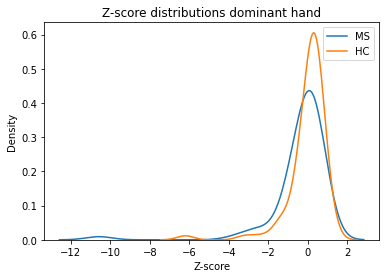

In [127]:
fig, ax = plt.subplots()
sns.kdeplot(df_dom_nonan_ms['z_egg_test_dom_time_total'], label='MS')
sns.kdeplot(df_dom_nonan_hc['z_egg_test_dom_time_total'], label='HC')
plt.legend()
plt.title('Z-score distributions dominant hand')
plt.xlabel('Z-score')
plt.savefig('z-scores_dom', bbox_inches='tight', dpi = 300)

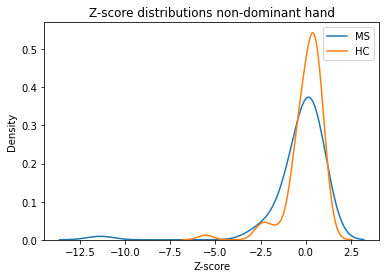

In [128]:
fig, ax = plt.subplots()
sns.kdeplot(df_dom_nonan_ms['z_egg_test_ndom_time_total'], label='MS')
sns.kdeplot(df_dom_nonan_hc['z_egg_test_ndom_time_total'], label='HC')
plt.legend()
plt.title('Z-score distributions non-dominant hand')
plt.xlabel('Z-score')
plt.savefig('z-scores_ndom', bbox_inches='tight', dpi = 300)